<a href="https://colab.research.google.com/github/BehzadBarati/Ingredient-Maps/blob/main/Food_Recipes_RecipeNLG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abstract:

This notebook produces elementary reports on RecipeNLG dataset which contains more than 2 million recipies of foods.
___
Source:

My main refrences are [RecipeNLG paper](https://www.aclweb.org/anthology/2020.inlg-1.4.pdf) and its [dataset](https://recipenlg.cs.put.poznan.pl).
___
Input: 

1- Dataset of [RecipeNLG](https://recipenlg.cs.put.poznan.pl)

Ouput:

1- EDA report on RecipeNLG dataset (both inline and "EDA-Report-RecipeNLG.html" file)

2- word cloud pictures (inline)

3- list of source websites of recipies ( "Websites-RecipeNLG.csv" file)
___
Hints:

1_ As our csv file is greater than 2 gigabytes, I prefer to use cloud services(here google colab). I uploaded RecipeNLG dataset in my [google drive](https://drive.google.com/drive/folders/1g1ZNYKlLN4hyP8ywHXWa2Iu1oQ4wxSgR?usp=sharing). It is public.

2_ If there is out of memory error in running "ProfileReport", please first re-install latest version of "pandas_profiling" library, then try "minimal=True" argument in "profileReport" for eliminating some calculations. (pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip)

# Import needed libraries

In [2]:
# Install pandas_profiling library
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

import numpy as np
import pandas as pd 
from wordcloud import WordCloud             #Make wordcloud pictures
from pandas_profiling import ProfileReport  #Generate brief report on our dataframe
import matplotlib.pyplot as plt
from google.colab import drive              ##Mount google drive to colab notebook

# load data

In [3]:
# Mount google drive to colab notebook
# Our dataset will be read as recipe_df.

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
cd gdrive/MyDrive/Projects/Ingredient-Maps/Phase1

/content/gdrive/MyDrive/Projects/Ingredient-Maps/Phase1


In [5]:
# Reading file and check if data is loaded

recipe_df = pd.read_csv('./dataset/RecipeNLG.csv')
print('Number of recipes in dataset: ', len(recipe_df))
print('last 5 recipes:')
recipe_df.tail(5)

Number of recipes in dataset:  2231142
last 5 recipes:


,Unnamed: 0,title,ingredients,directions,link,source,NER
2231137,2231137,Sunny's Fake Crepes,"[""1/2 cup chocolate hazelnut spread (recommend...","[""Spread hazelnut spread on 1 side of each tor...",www.foodnetwork.com/recipes/sunny-anderson/sun...,Recipes1M,"[""chocolate hazelnut spread"", ""tortillas"", ""bu..."
2231138,2231138,Devil Eggs,"[""1 dozen eggs"", ""1 paprika"", ""1 salt and pepp...","[""Boil eggs on medium for 30mins."", ""Then cool...",cookpad.com/us/recipes/355411-devil-eggs,Recipes1M,"[""eggs"", ""paprika"", ""salt"", ""choice"", ""miracle..."
2231139,2231139,Extremely Easy and Quick - Namul Daikon Salad,"[""150 grams Daikon radish"", ""1 tbsp Sesame oil...","[""Julienne the daikon and squeeze out the exce...",cookpad.com/us/recipes/153324-extremely-easy-a...,Recipes1M,"[""radish"", ""Sesame oil"", ""White sesame seeds"",..."
2231140,2231140,Pan-Roasted Pork Chops With Apple Fritters,"[""1 cup apple cider"", ""6 tablespoons sugar"", ""...","[""In a large bowl, mix the apple cider with 4 ...",cooking.nytimes.com/recipes/1015164,Recipes1M,"[""apple cider"", ""sugar"", ""kosher salt"", ""bay l..."
2231141,2231141,Polpette in Spicy Tomato Sauce,"[""1 pound ground veal"", ""1/2 pound sweet Itali...","[""Preheat the oven to 350."", ""In a bowl, mix t...",www.foodandwine.com/recipes/polpette-spicy-tom...,Recipes1M,"[""ground veal"", ""sausage"", ""bread crumbs"", ""mi..."


# EDA

In [6]:
# Column 'Unnamed: 0' seems to be useless, I drop it for making our dataset smaller.
recipe_df.drop('Unnamed: 0', axis='columns', inplace=True)
print(recipe_df.columns)

Index(['title', 'ingredients', 'directions', 'link', 'source', 'NER'], dtype='object')


In [7]:
# Generate a quick report from our dataset 

profile = ProfileReport(recipe_df, minimal=True)
profile.to_file("EDA-Report-RecipeNLG.html")
profile

Summarize dataset:   0%|          | 0/14 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# For creating word clouds, I used WordCloud library which was imported before.

def minimal_wordcloud(df, column):
    """
    Generate a simple wordcloud similar to: 
    https://www.kaggle.com/paultimothymooney/explore-recipe-nlg-dataset/data.
    The only import required is: from wordcloud import WordCloud
    """
    text = str(df[column].values)
    wordcloud = WordCloud().generate(text)
    image = wordcloud.to_image()
    plt.axis("off")
    plt.imshow(image)
    plt.show()


world cloud of contents in column title


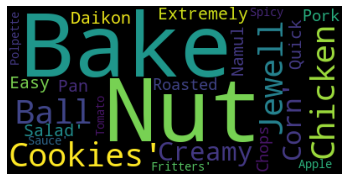


world cloud of contents in column ingredients


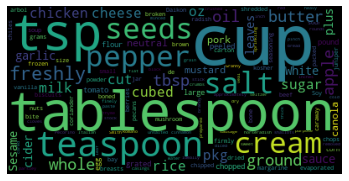


world cloud of contents in column directions


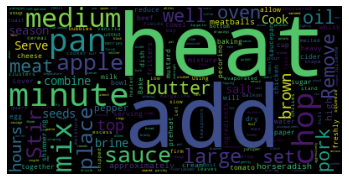


world cloud of contents in column link


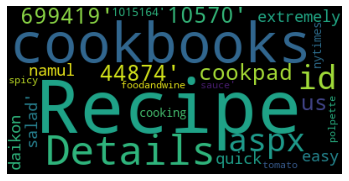


world cloud of contents in column source


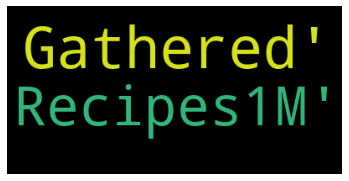


world cloud of contents in column NER


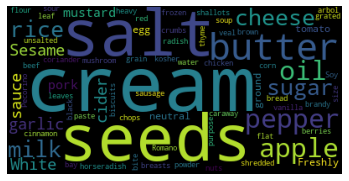

In [9]:
# Print word clouds

for c in recipe_df.columns:
    print('\nworld cloud of contents in column {}'.format(c))
    minimal_wordcloud(recipe_df, c)

# Generate a list of websites used in RecipieNLG

In [10]:
# Based on link column I tried to extract website names.
# This func helps to select website names where we do not have 'www' at beginning

func = lambda x: x[1] if x[0] == 'www' else x[0]
recipe_df['website'] = recipe_df['link'].str.split('.').apply(func)

In [11]:
recipe_df['website'].value_counts().rename_axis('websites').to_csv('./reports/Websites-RecipeNLG.csv',  header=['No. of recipies'])
recipe_df['website'].value_counts().rename_axis('websites')

websites
cookbooks          896341
food               499616
epicurious         129444
tastykitchen        78768
myrecipes           64895
allrecipes          64602
cookpad             61020
cookeatshare        59307
yummly              51963
tasteofhome         51594
foodnetwork         49443
food52              48501
kraftrecipes        42010
recipeland          24418
recipes-plus        20524
cooking             16367
foodandwine         15436
seriouseats         12632
foodgeeks            8963
cookstr              8797
online-cookbook      5691
chowhound            5671
vegetariantimes      4578
delish               3880
landolakes           2492
foodrepublic         2259
lovefood             1930
Name: website, dtype: int64